In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'C:\Users\shari\Desktop\Desktop\Data Analysis\Portfolio Projects\Coffee Sales/index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [8]:
df.shape

(976, 6)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
money,976.0,33.879754,4.640887,23.02,28.9,33.8,37.72,40.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         976 non-null    object 
 1   datetime     976 non-null    object 
 2   cash_type    976 non-null    object 
 3   card         887 non-null    object 
 4   money        976 non-null    float64
 5   coffee_name  976 non-null    object 
dtypes: float64(1), object(5)
memory usage: 45.9+ KB


In [14]:
df.drop('card', axis = 1, inplace = True)
df.columns

Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')

In [16]:
df.duplicated().sum()

0

In [18]:
cat_cols  = ['cash_type', 'coffee_name']
for col in cat_cols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("=============================")

Column: cash_type
cash_type
card    887
cash     89
Name: count, dtype: int64
Column: coffee_name
coffee_name
Americano with Milk    227
Latte                  203
Cappuccino             177
Americano              145
Cortado                 86
Hot Chocolate           71
Espresso                39
Cocoa                   28
Name: count, dtype: int64


In [20]:
#Converting datetime to Month, day, date and hour

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df

,date,datetime,cash_type,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte,3,1,13
...,...,...,...,...,...,...,...,...
971,2024-07-14,2024-07-14 22:31:29.976,card,32.82,Latte,7,14,22
972,2024-07-15,2024-07-15 07:33:05.557,card,32.82,Cappuccino,7,15,7
973,2024-07-16,2024-07-16 12:23:37.467,card,27.92,Americano with Milk,7,16,12
974,2024-07-16,2024-07-16 19:29:25.485,card,32.82,Hot Chocolate,7,16,19


In [24]:
#Exploratory Data Analysis

Text(0.5, 1.0, 'Payment Method Distribution (Barchart)')

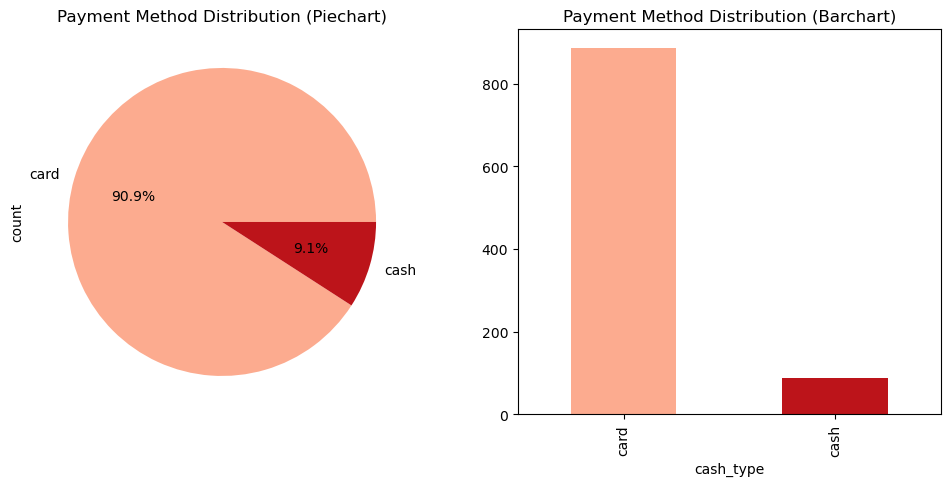

In [26]:
color = plt.cm.Reds(np.linspace(0.3, 0.8, 2))

fig, ax = plt.subplots(1, 2, figsize = (12,5))
df['cash_type'].value_counts().plot.pie(autopct = "%1.1f%%", colors = color, ax = ax[0])
ax[0].set_title('Payment Method Distribution (Piechart)')

df['cash_type'].value_counts().plot(kind = 'bar', color = color, ax = ax[1])
ax[1].set_title('Payment Method Distribution (Barchart)')

Text(0, 0.5, 'Coffee Type')

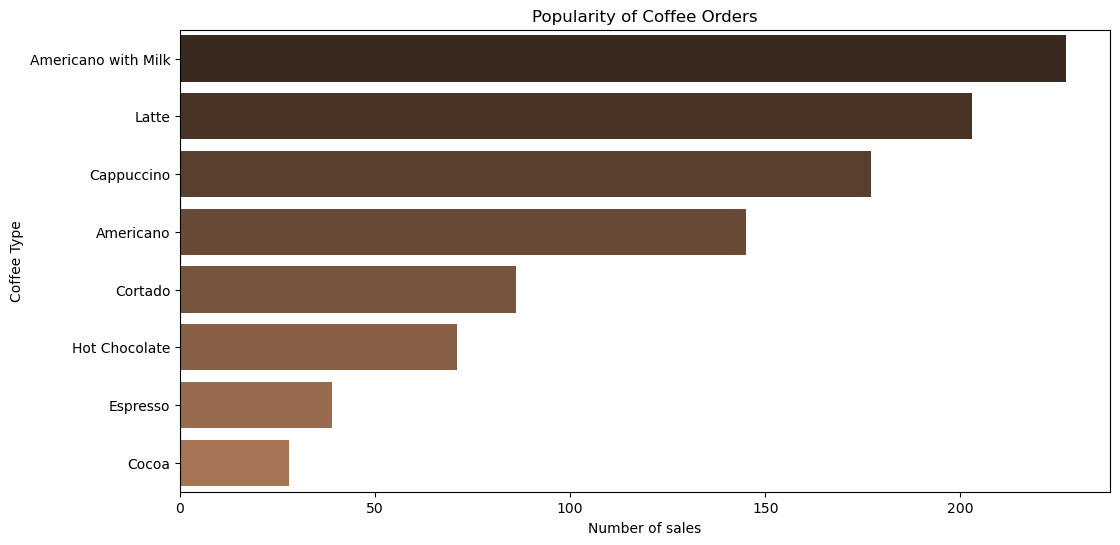

In [28]:
browns = plt.cm.copper(np.linspace(0.2, 1, 16))
plt.figure(figsize = (12, 6))
sns.countplot(y = df['coffee_name'], order = df['coffee_name'].value_counts().index, data = df, palette = browns)
plt.title('Popularity of Coffee Orders')
plt.xlabel('Number of sales')
plt.ylabel('Coffee Type')

C:\Users\shari\AppData\Local\Temp\ipykernel_76848\2208914163.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['money'], bins = 20, kde = True, palette = browns)
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Money Spent')

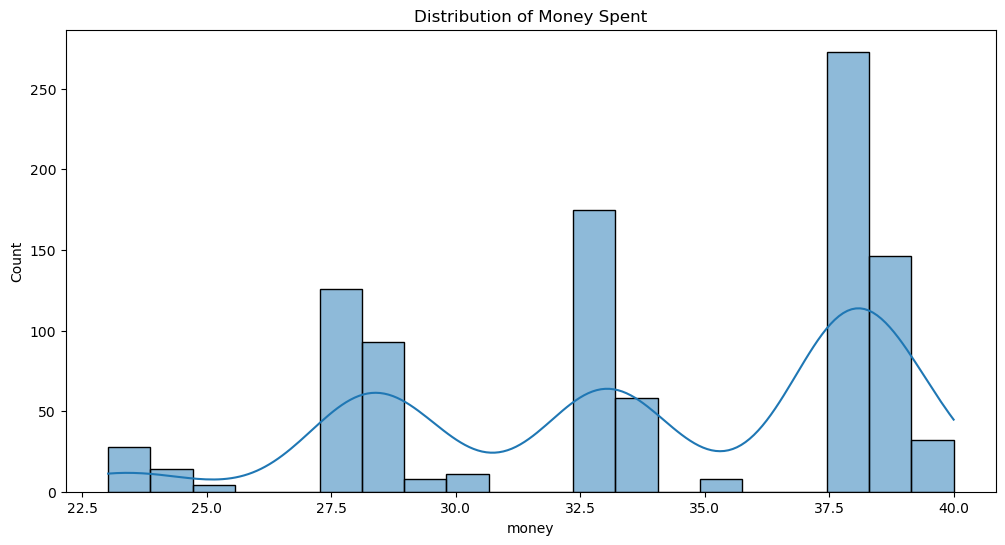

In [30]:
plt.figure(figsize = (12, 6))
sns.histplot(df['money'], bins = 20, kde = True, palette = browns)
plt.title('Distribution of Money Spent')

In [32]:
df.head()

,date,datetime,cash_type,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte,3,1,13


Text(0.5, 1.0, 'Sales per Coffee Type')

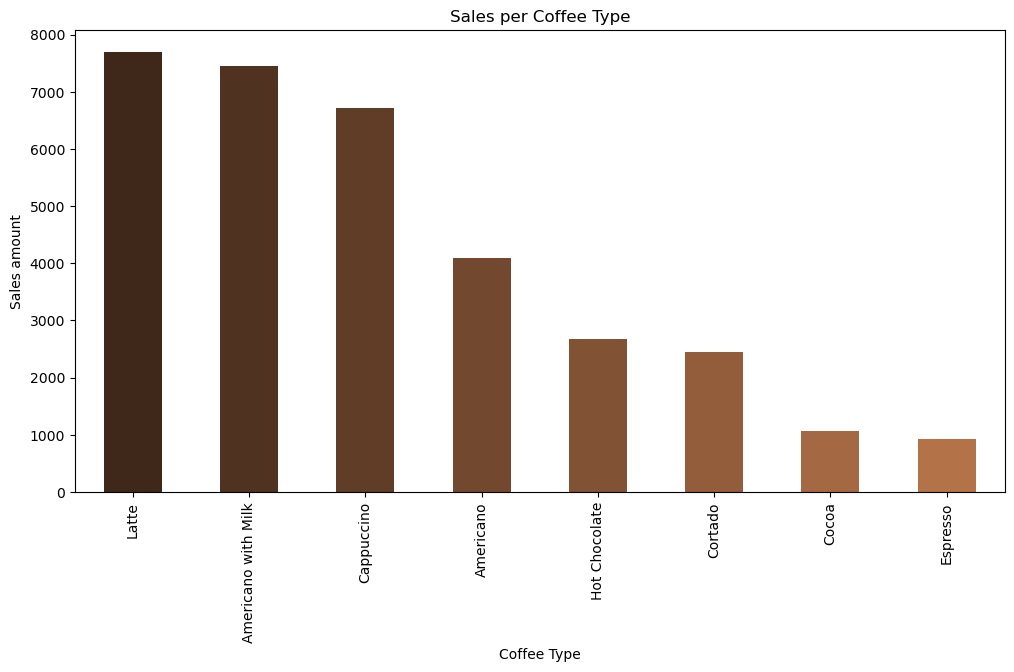

In [34]:
coffee_group = df.groupby('coffee_name')['money'].sum()
coffee_group = coffee_group.sort_values(ascending = False)
coffee_group.plot(kind = "bar", figsize = (12, 6), color = browns)
plt.xlabel('Coffee Type')
plt.ylabel('Sales amount')
plt.title('Sales per Coffee Type')

Text(0, 0.5, 'Number of Transactions')

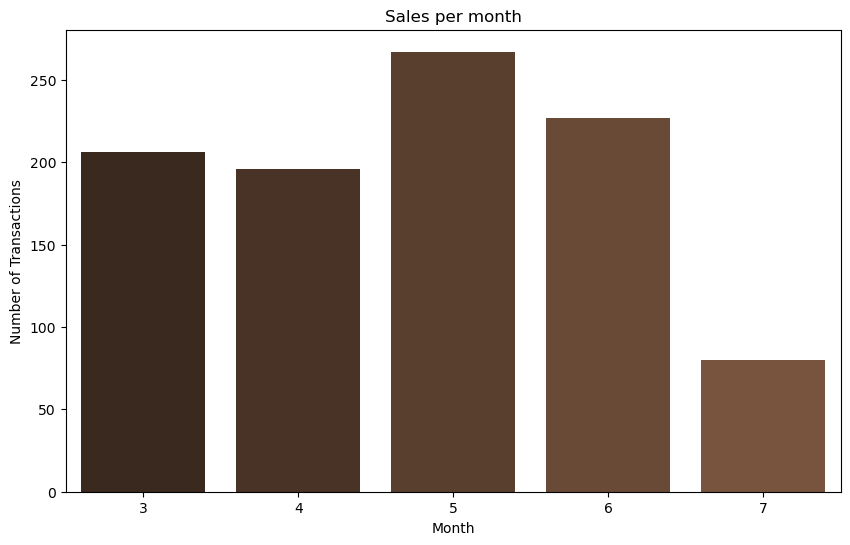

In [36]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['month'], palette = browns)
plt.title('Sales per month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

Text(0, 0.5, 'Total Sales Amount')

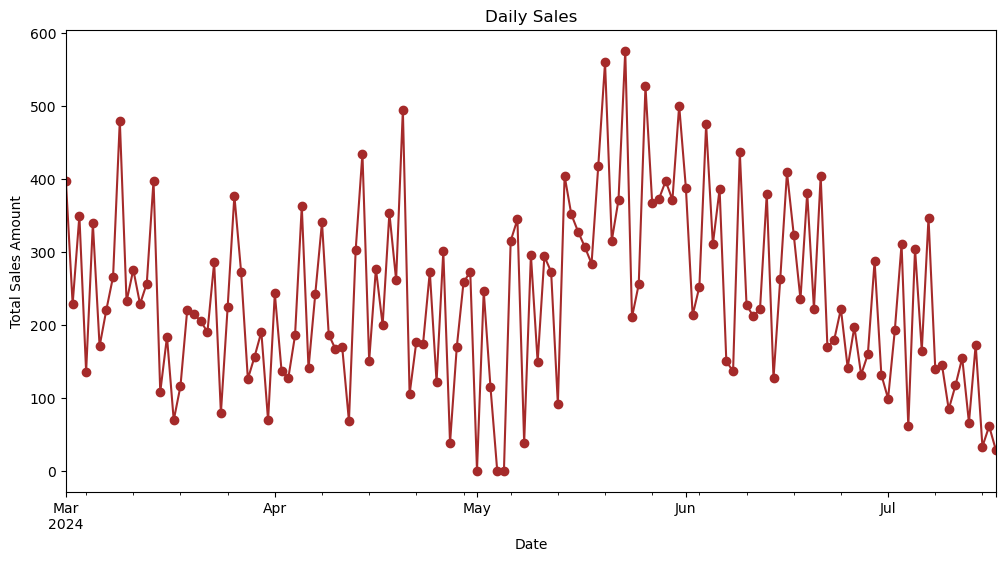

In [40]:
df['datetime'] = pd.to_datetime(df['datetime'])  # Convert to datetime

plt.figure(figsize=(12, 6))
df.set_index('datetime')['money'].resample('D').sum().plot(kind="line", marker="o", color='brown')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')

Text(0, 0.5, 'Sales amount')

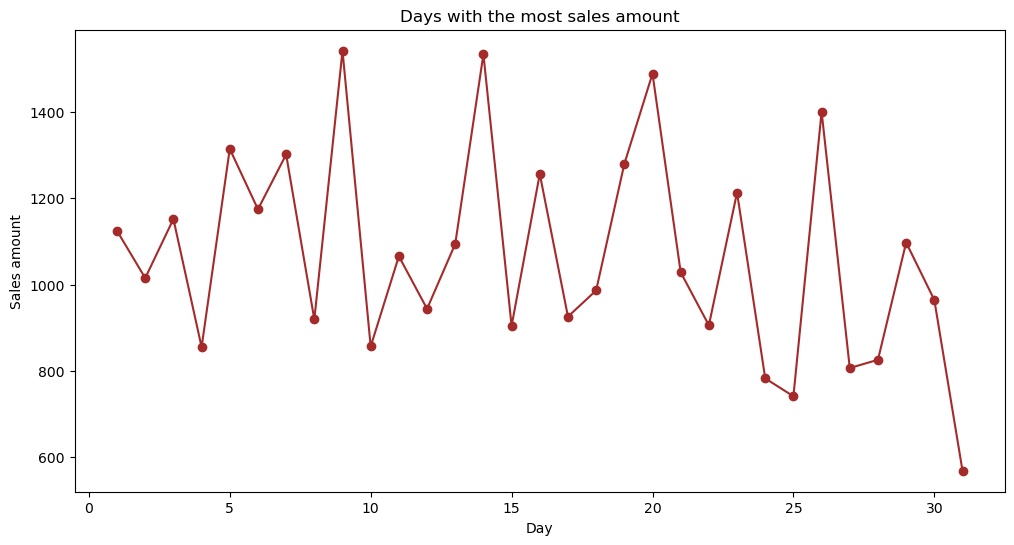

In [42]:
plt.figure(figsize = (12, 6))
df.groupby('day')['money'].sum().plot(kind = "line", color = "brown", marker = 'o')
plt.title('Days with the most sales amount')
plt.xlabel('Day')
plt.ylabel('Sales amount')

Text(0, 0.5, 'Number of Sales')

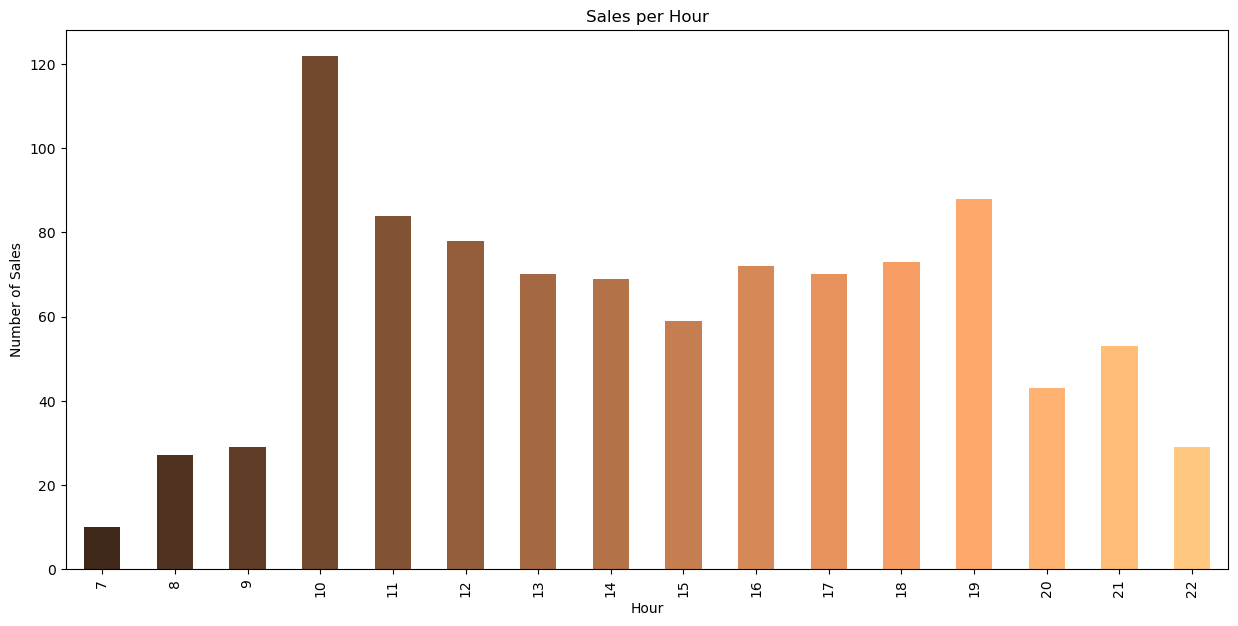

In [44]:
df.groupby('hour').size().plot(kind = "bar", figsize = (15,7), color = browns)
plt.title('Sales per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')